<a href="https://colab.research.google.com/github/preety-lab/Task-The-Spark-Foundations/blob/master/Task_5_To_Explore_Business_Analytics_ipynb_by_Preety_Gautam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 5: To Explore Business Analytics**

Perform ‘Exploratory Data Analysis’ on the provided dataset SampleSuperstore

**Problem statement:** You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit. What all business problems you can derive by looking into the data?


In [20]:
#Importing required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


In [21]:
#Importing the data
super_store = pd.read_csv('SampleSuperstore.csv')
super_store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [22]:
#Shape of the data
super_store.shape

(9994, 13)

In [23]:
super_store.columns.tolist()

['Ship Mode',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Category',
 'Sub-Category',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

In [24]:
super_store.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 5.5 MB


**From the observed information :**

**Numerical variables:**   Postal Code, Sales, Quantity, Discount, Profit

**Categorical variables:**  Ship Mode, Segment, Country, City, State, Region, Category, Sub-Category



In [25]:
#Checking for any null values, if any, in the data
super_store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Hence,  there are no missing values. So, there is no need to impute any values.

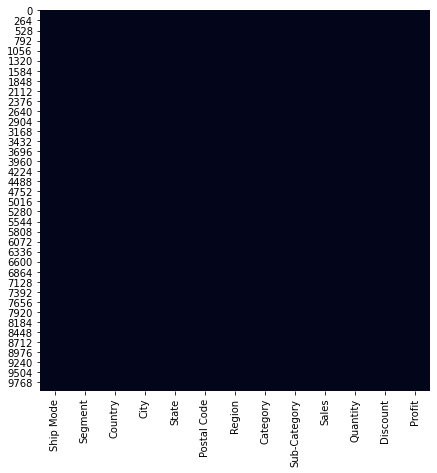

In [26]:
#Just for surity, we can also visualize the non presence of missing values
plt.figure(figsize = (7, 7))
sns.heatmap(super_store.isnull(), cbar = False);

In [27]:
#Let's have a look at the values of each feature
for i in super_store.columns:
    print('***************',i,'***************')
    print(super_store[i].value_counts(), '\n')

*************** Ship Mode ***************
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64 

*************** Segment ***************
Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64 

*************** Country ***************
United States    9994
Name: Country, dtype: int64 

*************** City ***************
New York City     915
Los Angeles       747
Philadelphia      537
San Francisco     510
Seattle           428
                 ... 
Holyoke             1
Portage             1
Orland Park         1
Grand Island        1
Citrus Heights      1
Name: City, Length: 531, dtype: int64 

*************** State ***************
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan               

In [28]:
super_store.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

Dropping Postal Code as it is not necessary to be included. Also, dropping Country as it only inclues USA for all 9994 rows.

In [29]:
super_store.drop(['Postal Code', 'Country'], axis = 1, inplace = True)

In [30]:
#Descriptive statistics of the data
super_store.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


**Observations:**

All the numerical variables have same count i.e. 9994.


The minimum value of Sales is 0.5 but the difference between third quartile (Q3) and max values shows that it is highly skewed.


The Quantity may have normal distribution.


The Discount too may be have normal distribution and also it is very less scattered.


The Profit is highly skewed as mean (28.7) is very low but standard deviation (234) is very high.


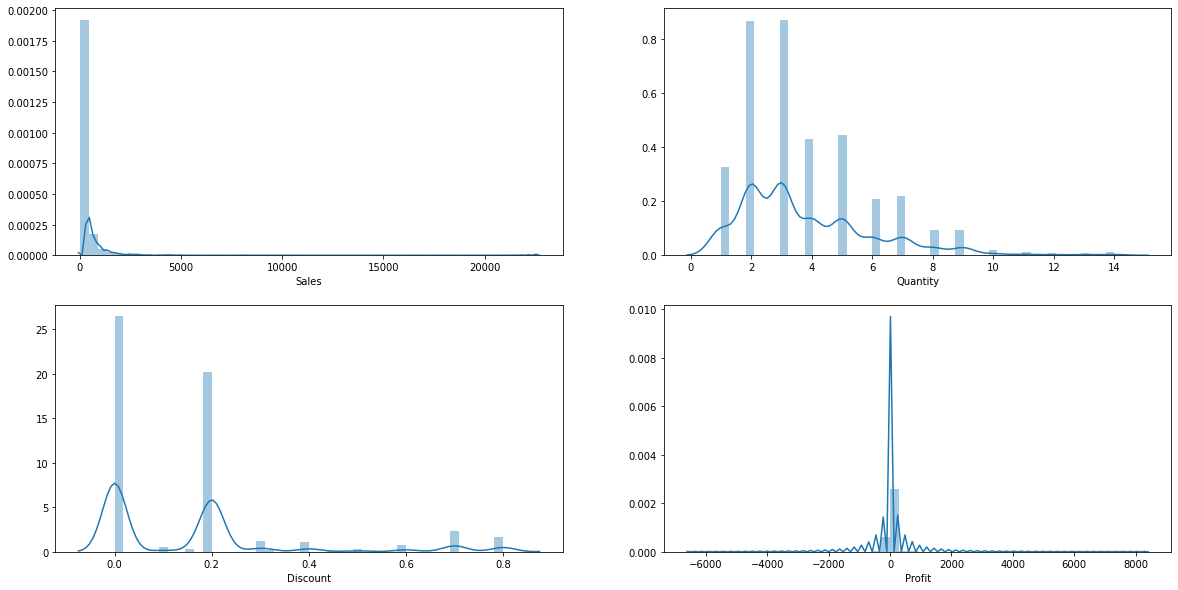

In [31]:
fig, axes = plt.subplots(figsize = (20, 10), nrows = 2, ncols = 2)
for i, ax in zip(super_store.describe().columns, axes.flat):
    sns.distplot(super_store[i], ax = ax);
plt.show();

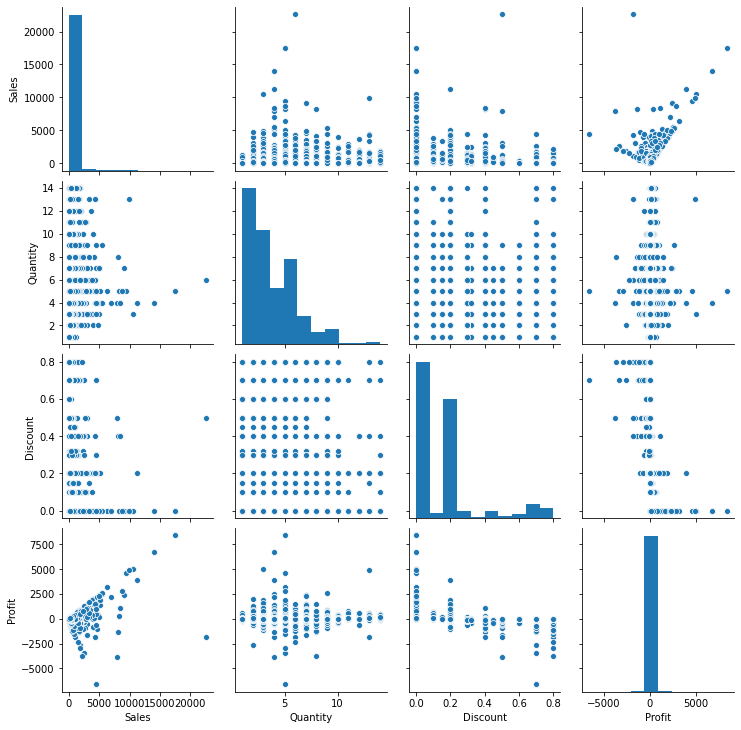

In [32]:
sns.pairplot(super_store);

In [33]:
#Correlation matrix
super_store.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


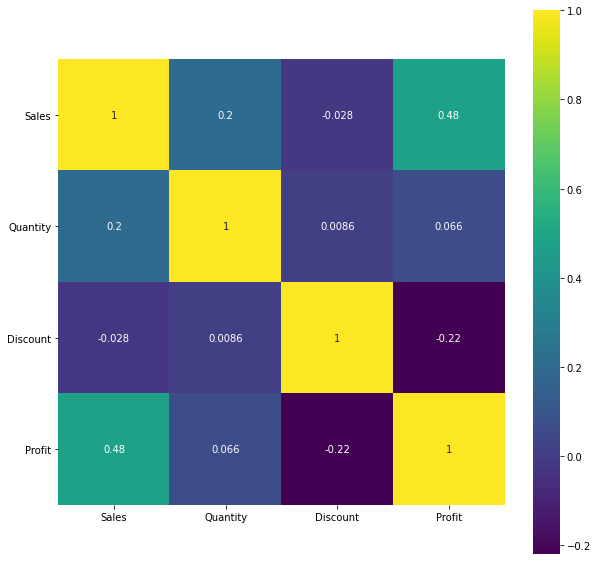

In [34]:
#Plotting a correlation heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(super_store.corr(), annot = True, square = True, cmap = 'viridis')
plt.yticks(rotation = 0);

**Observations:**

There is a weak positive correlation (48%) between Sales and Profit which indicates that increase in sales will increase the profit but in less proportion.


Extremely weak positive correlation (6.6%), which is almost negligible, exists between Quantity and Profit.


There exists very weak negative correlation (22%) between Discount and Profit which indicates that as discount increases then the profit decreases in less proportion and vice-versa.

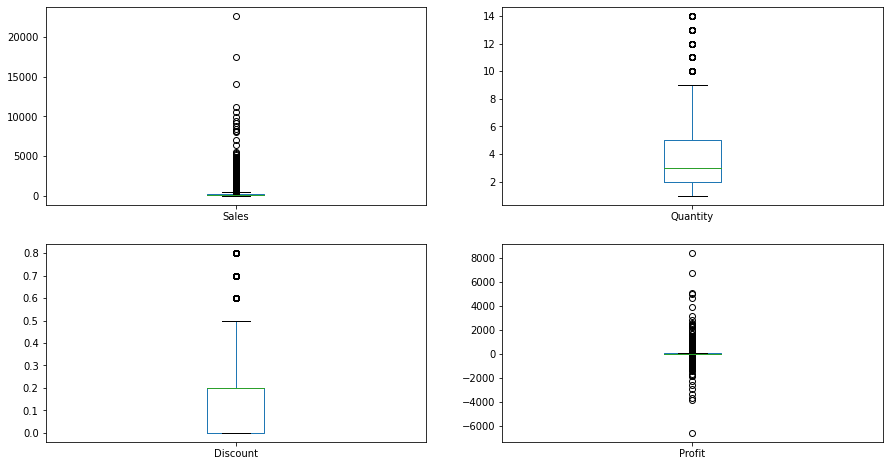

In [35]:
#Plotting Box-Whisker plots
super_store.plot(kind = 'box', subplots = True, layout = (2, 2), sharex = False, sharey = False, figsize = (15, 8));

**Observation:** There is the presence of outliers in Sales, Quantity and Profit. Since, there is presnce of outliers, I would not be removing them as it is crucial information and also here we are not required to build any model in this task. But Profit has the most outliers but it is also a very important feature and losing data about profit may lead to false insights later on.

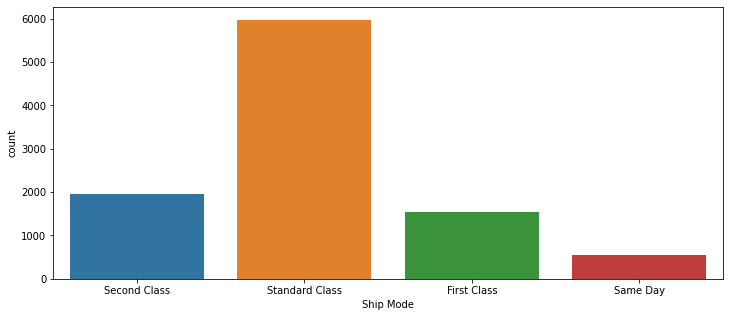

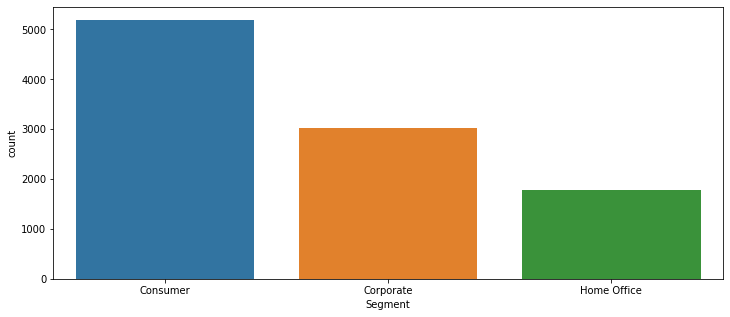

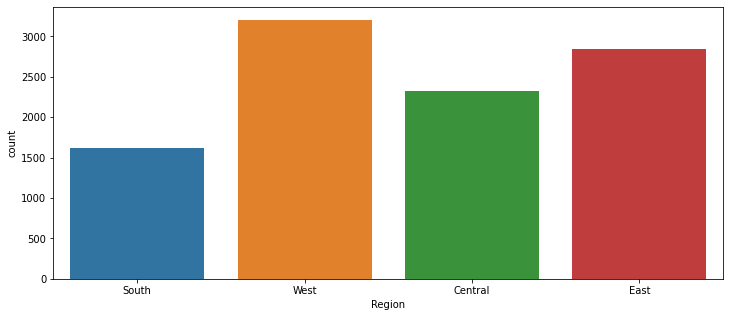

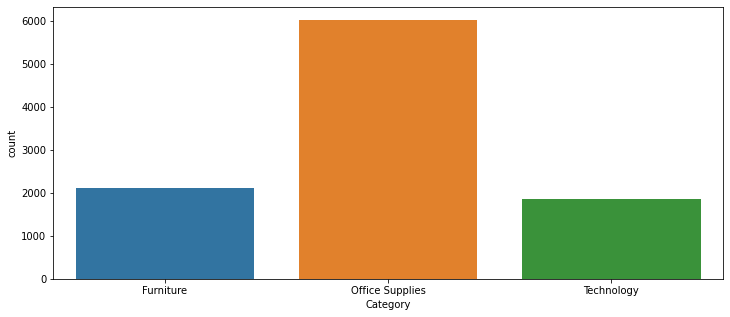

In [36]:
for i in super_store[['Ship Mode', 'Segment', 'Region', 'Category']]:
    plt.figure(figsize = (12, 5))
    sns.countplot(super_store[i]) 
    plt.show();

**Observations:**

In Ship Mode, Standard Class has the highest count which means the customers have opted for this type of shipping mode the most.

In Segment, Consumer class has the highest count which depicts that generally consumers use the most shipping.

West and East regions have the highest counts, almost similar.

The Category which is shipped the most is Office Supplies.

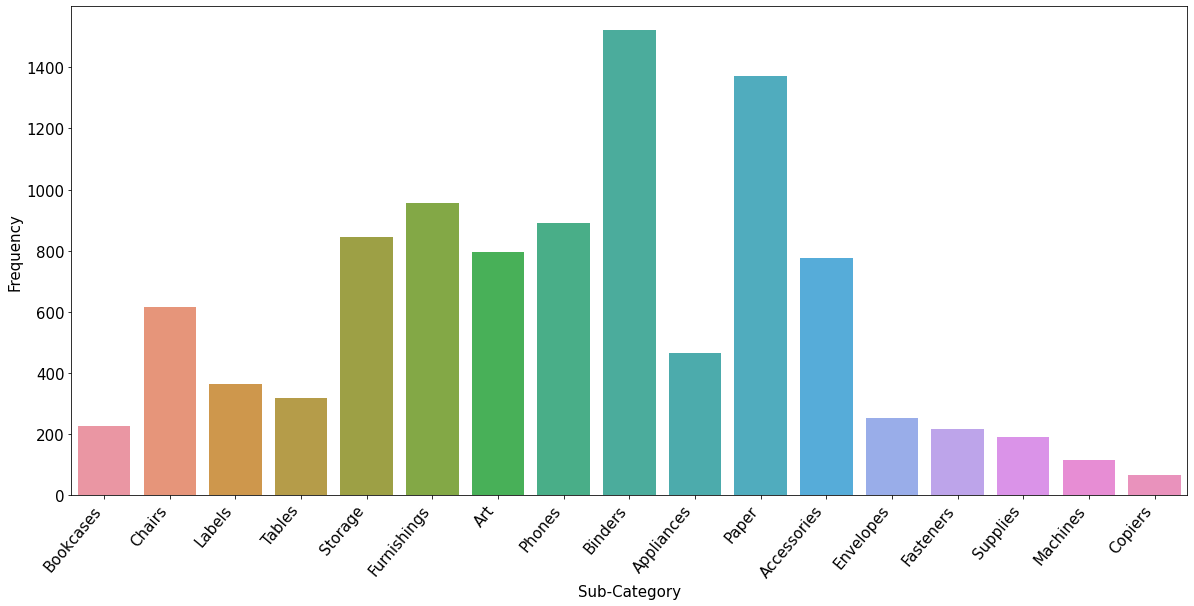

In [37]:
plt.figure(figsize = (20, 9))
sns.countplot(super_store['Sub-Category']) 
plt.xticks(rotation = 50, ha = 'right', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Sub-Category', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15);

FROM THE ABOVE FIG WE GET:

 **The top 5 sub-categories are as follows:**

Binders

Paper

Furnishings

Phones

Storage

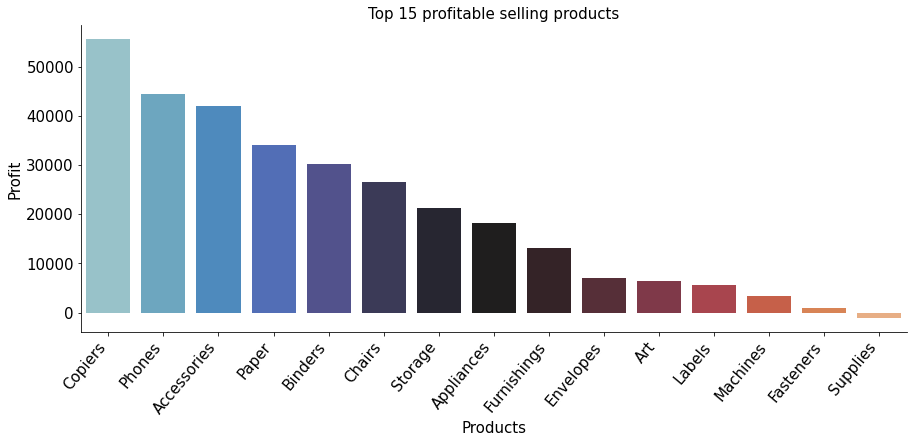

In [38]:
#Top 15 profitable selling products
top_15 = super_store.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending = False)
sns.catplot(x = 'Sub-Category', y = 'Profit', data = top_15.head(15), kind = 'bar', aspect = 2.5, palette = 'icefire')
plt.title('Top 15 profitable selling products', fontsize = 15)
plt.xticks(rotation = 50, ha = 'right', fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Profit', fontsize = 15)
plt.xlabel('Products', fontsize = 15);

 **The top 5 profitable products are as follows:**

Copiers

Phones

Accessories

Paper

Binders


**One more thing to be noted is that in Sub-Category, Machines and Copiers have the lowest count. But the main thing is that the most profitable product is the Copiers being at the top selling product.**

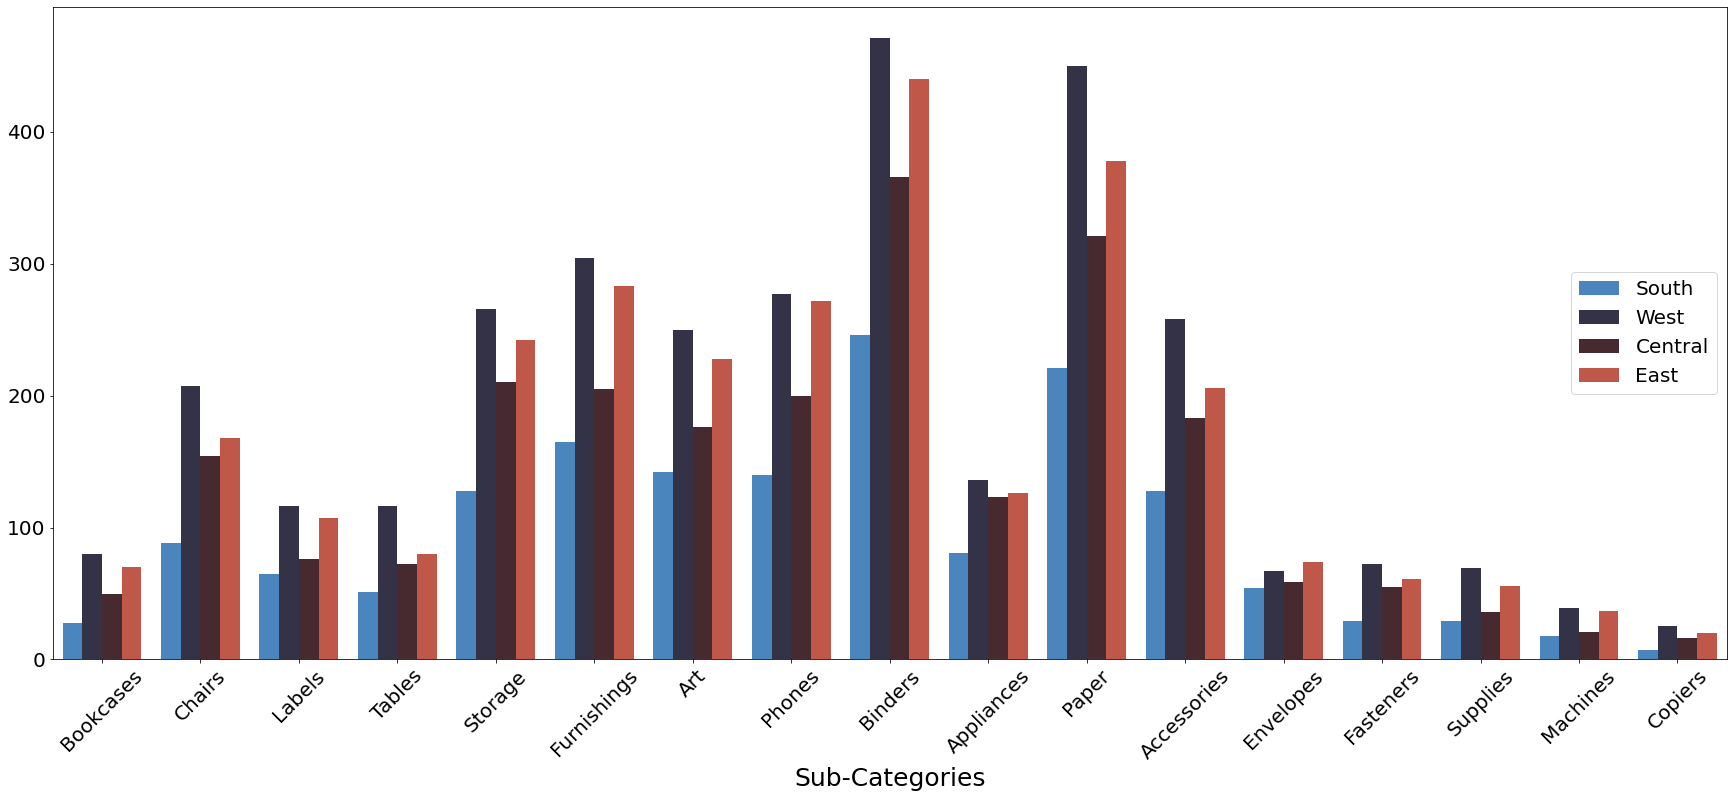

In [39]:
plt.figure(figsize = (30, 12))
sns.countplot(x = 'Sub-Category', hue = 'Region', data = super_store, palette = 'icefire')
plt.xticks(rotation = 45, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Sub-Categories', fontsize = 25)
plt.ylabel('', fontsize = 20)
plt.legend(loc = 5, fontsize = 20);

**The top 5 sub-categories distributed according to the region are as follows:**

Binders

Paper

Furnishings

Phones

Storage

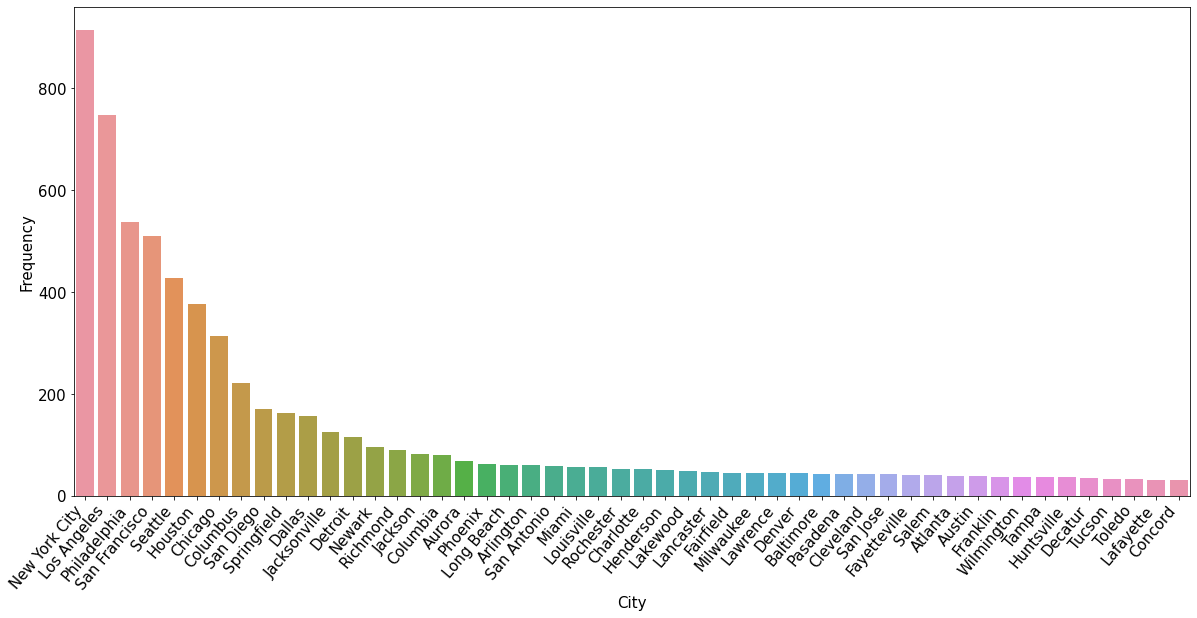

In [40]:
plt.figure(figsize = (20, 9))
sns.countplot(x = super_store['City'], order = (super_store['City'].value_counts().head(50)).index)
plt.xticks(rotation = 50, ha = 'right', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('City', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15);

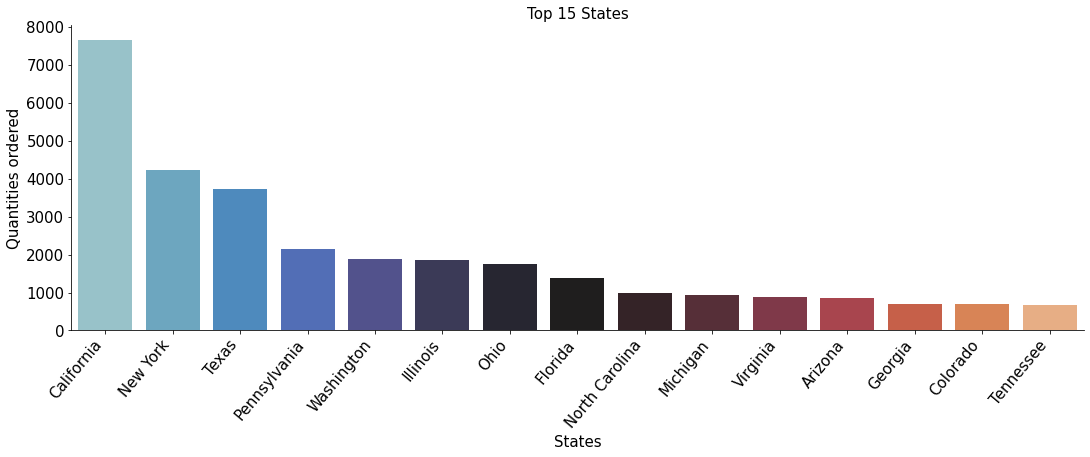

In [41]:
#To be more precise, we can get top 15 states for the above graph as shown below.
top_15 = super_store.groupby('State')['Quantity'].sum().reset_index().sort_values(by = 'Quantity', ascending = False)
sns.catplot(x = 'State', y = 'Quantity', data = top_15.head(15), kind = 'bar', palette = 'icefire', aspect = 3)
plt.title('Top 15 States', fontsize = 15)
plt.xticks(rotation = 50, ha = 'right', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('States', fontsize = 15)
plt.ylabel('Quantities ordered', fontsize = 15);


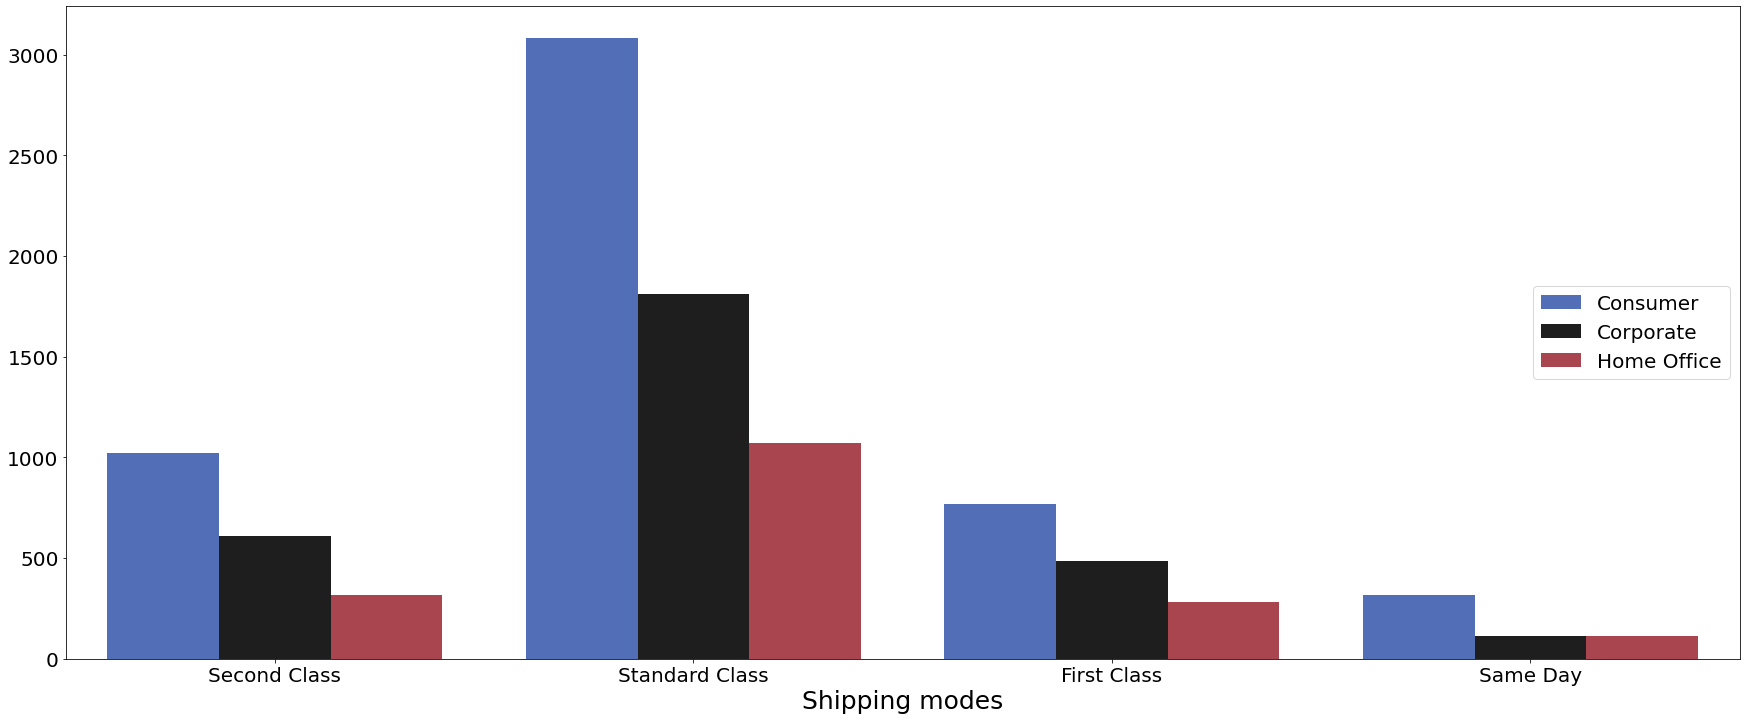

In [42]:
plt.figure(figsize = (30, 12))
sns.countplot(x = 'Ship Mode', hue = 'Segment', data = super_store, palette = 'icefire')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Shipping modes', fontsize = 25)
plt.ylabel('', fontsize = 20)
plt.legend(loc = 5, fontsize = 20);

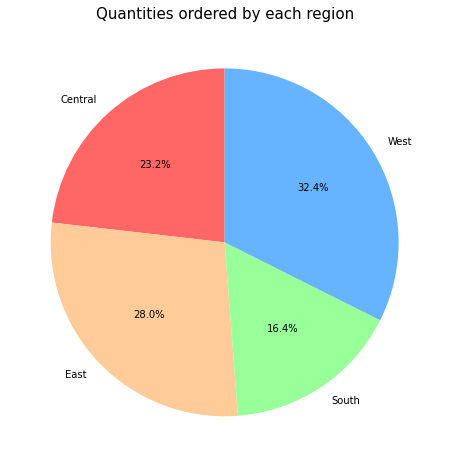

In [43]:
super_store_region = super_store.groupby('Region')['Quantity'].sum().reset_index()
plt.figure(figsize = (12, 8))
plt.pie(super_store_region['Quantity'], labels = super_store_region['Region'].unique(), autopct='%1.1f%%', startangle = 90,
       colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff'])
plt.title('Quantities ordered by each region', fontsize = 15);


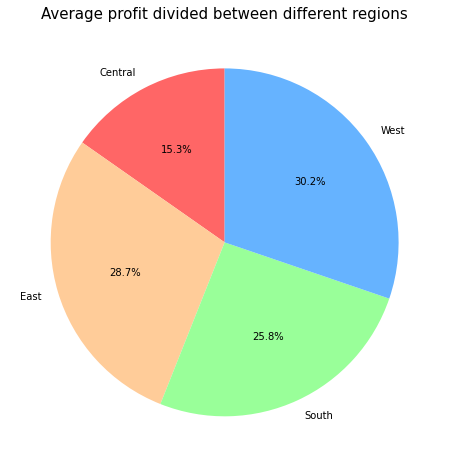

In [44]:
super_store_region = super_store.groupby('Region')['Profit'].mean().reset_index()
plt.figure(figsize = (12, 8))
plt.pie(super_store_region['Profit'], labels = super_store_region['Region'].unique(), autopct = '%.1f%%', startangle = 90,
       colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff'])
plt.title('Average profit divided between different regions', fontsize = 15);


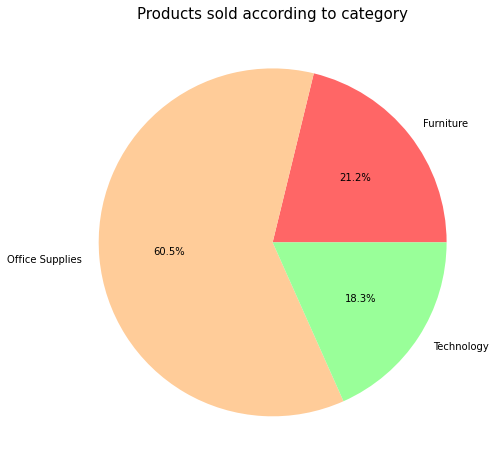

In [45]:
#Most selling categories
super_store_cat = super_store.groupby('Category')['Quantity'].sum().reset_index()
plt.figure(figsize = (12, 8))
plt.pie(x = super_store_cat['Quantity'], labels = super_store_cat['Category'].unique(), autopct = '%1.1f%%',
       colors = ['#ff6666', '#ffcc99', '#99ff99'])
plt.title('Products sold according to category', fontsize = 15);

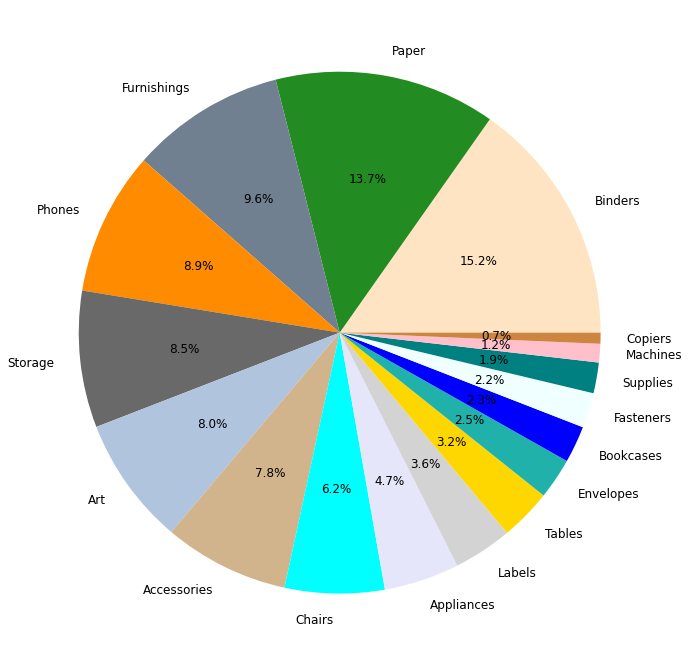

In [50]:
plt.figure(figsize=(13, 12))
plt.pie(x = super_store['Sub-Category'].value_counts(), labels = super_store['Sub-Category'].value_counts().index, 
       colors = ['bisque', 'forestgreen', 'slategrey', 'darkorange', 'dimgray', 'lightsteelblue', 'tan', 'cyan', 'lavender', 
                'lightgrey', 'gold', 'lightseagreen', 'blue', 'azure', 'teal', 'pink', 'peru'], autopct = '%1.1f%%', 
       textprops = {'fontsize': 12});

**Conclusion:**
#The profit of the retail form is affected by every feature except Country and Postal Code.


In almost every case it is clearly visible that more sales lead to more profit levels.

The Category which is shipped the most is Office Supplies.

New York City is the top city having highest sales.

In terms of state, California has the highest sales and profit generation.

Western and Eastern regions have ordered more quantities, around 32.4% and 28%, respectively.

Office Supplies are the products which are sold in huge quantity.

In Ship Mode, Standard Class has the highest count which means the customers have opted for this type of shipping mode the most. It has the most profitable level and also the hughest amount of sales. The Company can also try to increase profit reducing the lead time.

In Segment, Consumer class has the highest purchasing power which increase sales and profit, whereas, Home Office has the least sales. If the company has to increase its sales and profits it need to focus on Home Office segment.

After adding Segment feature to the Ship Mode, we saw that Standard Class with Consumer segment has generated the highest amount of profit.

West and East regions have the highest counts, almost similar. If the company has to increase its sales region wise then the firm should focus more on the Central and South regions where they are in loss and new schemes can be introduced there to increase more profit and sales.

Also, sale in Central (23.2%) region is relatively higher than the South (16.4%) region but still its contribution in our profit is very low which should be taken care of.

The Most demanding materials are Binders, Papers and furnishings while the least are Copiers, Machines and Supplies. To increase the firm's revenue they need to increase the production and transportation for Binders, Papers and Furnishings but most importantly they need to focus on the least demanding products like Copiers, Machines and Supplies.

Firm provides highest quantity for Office Suppliers but sales are not that much good enough which results in very low profit, quantity should be minimized and the main focus should be on Furniture category instead of Office Suppliers.

**Observations on numerical features:**

All the numerical variables have same count i.e. 9994.

The minimum value of Sales is 0.5 but the difference between third quartile (Q3) and max values shows that it is highly skewed.

The Quantity may have normal distribution.

The Discount too may be have normal distribution and also it is very less scattered.

The Profit is highly skewed as mean (28.7) is very low but standard deviation (234) is very high.

There is a weak positive correlation (48%) between Sales and Profit which indicates that increase in sales will increase the profit but in less proportion.

Extremely weak positive correlation (6.6%), which is almost negligible, exists between Quantity and Profit.

There exists very weak negative correlation (22%) between Discount and Profit which indicates that as discount increases then the profit decreases in less proportion and vice-versa.

There is the presence of outliers in Sales, Quantity and Profit.